In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import array

In [2]:
# 读取数据
esf_olduser_index = pd.read_table('./files/chuanshanjia_esf_muid.txt')
esf_olduser_index.head()

,muid,imei_md5,oaid,origin_imei,os_type,vppv_esf,active_days_esf,guanzhu_esf,session_num_esf,takelook_order_esf,cal_dt
0,"a-ajk,00042bf985ee7d88,",00042bf985ee7d88,ffbbff7c-fffd-a054-bf3b-eb9fafef165e,867834046042564,android,91,3,0,0,0,2021-05-05
1,"a-ajk,000583ef5b66b6da,000583ef5b66b6da",000583ef5b66b6da,fa3c3e37-fd8d-0e2a-f7ff-febda376c9b9,861737043502785,android,0,0,0,0,0,2021-05-05
2,"a-ajk,00086270a94d1812,00086270a94d1812",00086270a94d1812,558056f4f686e53386b1e3bf88c7daf58cbc7adfc506ce...,NaN,android,0,0,0,0,0,2021-05-05
3,"a-ajk,000c9dec98080e95,000c9dec98080e95",000c9dec98080e95,75b3e08b83d1d58d741acead0e46f9120c913565cb208b...,865438043237979,android,0,0,0,0,0,2021-05-05
4,"a-ajk,0022bc6b1dea0aca,0022bc6b1dea0aca",0022bc6b1dea0aca,ee3faa27-5fff-dbae-6fcd-6ccbf5f08972,NaN,android,0,0,0,0,0,2021-05-05


# 一、二手房指标部分

## 1、先看二手房整体数据的统计描述

In [3]:
esf_olduser_index.describe()

,vppv_esf,active_days_esf,guanzhu_esf,session_num_esf,takelook_order_esf
count,1.717825e+06,1.717825e+06,1.717825e+06,1.717825e+06,1.717825e+06
mean,4.505645e+00,4.621862e-01,2.627276e-02,1.130563e-01,1.897166e-03
std,2.836748e+01,1.100633e+00,6.837140e-01,3.782881e+00,1.065023e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.235000e+03,7.000000e+00,2.090000e+02,1.834000e+03,4.200000e+01


## 2、再看二手房vppv数据分布

In [12]:
# 存放vcpv数据
vppv_array = np.array(esf_olduser_index.loc[:,'vppv_esf'])
vppv_not0_array = vppv_array[vppv_array>0]  # vppv大于0的vppv分布情况

In [13]:
# 存放vppv百分位数,90%的数据都在45以下
# 箱线图剔除异常值的方式不可用，因为分布严重左偏——会把大部分数据判断为异常值
vppv_pct = np.array([np.percentile(vppv_not0_array, 10)
                       ,np.percentile(vppv_not0_array, 20)
                       ,np.percentile(vppv_not0_array, 30)
                       ,np.percentile(vppv_not0_array, 40)
                       ,np.percentile(vppv_not0_array, 50)
                       ,np.percentile(vppv_not0_array, 60)
                       ,np.percentile(vppv_not0_array, 70)
                       ,np.percentile(vppv_not0_array, 80)
                       ,np.percentile(vppv_not0_array, 90)
                       ,np.percentile(vppv_not0_array, 99)])
vppv_pct

array([  1.,   1.,   1.,   2.,   3.,   5.,  10.,  19.,  45., 248.])

In [14]:
# 剔除极端值之后的vppv统计值
vppv_df = pd.DataFrame(esf_olduser_index.loc[:,'vppv_esf'])
norm_vppv_df = vppv_df[vppv_df<=45]
norm_vppv_df.describe()

,vppv_esf
count,1.677800e+06
mean,1.507224e+00
std,5.192366e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.500000e+01


Text(0.5, 1.0, 'vppv分布 箱线图')

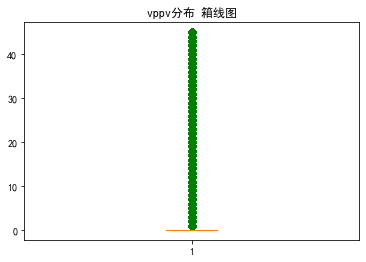

In [15]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_vppv_array=vppv_array[vppv_array<=45]
# change outlier point symbols
ax.boxplot(normal_vppv_array, 0, 'gD')
ax.set_title('vppv分布 箱线图')

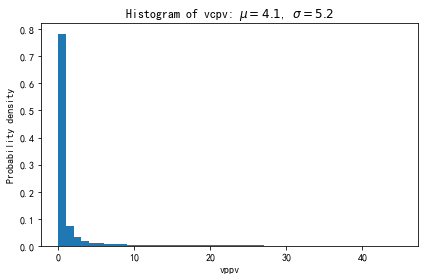

In [17]:
# 查看vppv分布情况-直方图

num_bins = 45
mu = 4.1  # mean of distribution
sigma = 5.2  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_vppv_array, num_bins, density=True)

ax.set_xlabel('vppv')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of vcpv: $\mu=4.1$, $\sigma=5.2$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 3、再看二手房关注数的数据分布

In [18]:
# 存放guanzhu_esf数据
esfgz_array = np.array(esf_olduser_index.loc[:,'guanzhu_esf'])
esfgz_not0_array = esfgz_array[esfgz_array>0]

In [19]:
# 存放guanzhu_esf百分位数,90%的数据都在5以下
esfgz_not0_pct = np.array([np.percentile(esfgz_not0_array, 10)
                       ,np.percentile(esfgz_not0_array, 20)
                       ,np.percentile(esfgz_not0_array, 30)
                       ,np.percentile(esfgz_not0_array, 40)
                       ,np.percentile(esfgz_not0_array, 50)
                       ,np.percentile(esfgz_not0_array, 60)
                       ,np.percentile(esfgz_not0_array, 70)
                       ,np.percentile(esfgz_not0_array, 80)
                       ,np.percentile(esfgz_not0_array, 90)
                       ,np.percentile(esfgz_not0_array, 99)])
esfgz_not0_pct

array([ 1.,  1.,  1.,  2.,  2.,  3.,  4.,  6., 11., 37.])

In [21]:
# 剔除极端值之后的esfgz统计值
esfgz_df = pd.DataFrame(esf_olduser_index.loc[:,'guanzhu_esf'])
norm_esfgz_df = esfgz_df[esfgz_df<=11]
norm_esfgz_df.describe()

,guanzhu_esf
count,1.716927e+06
mean,1.457371e-02
std,2.715867e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.100000e+01


Text(0.5, 1.0, '关注数分布 箱线图')

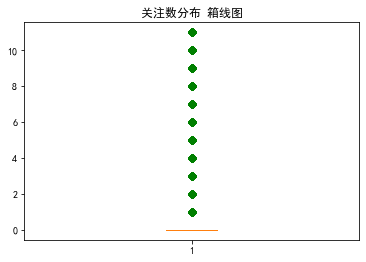

In [22]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_esfgz_array=esfgz_array[esfgz_array<=11]
# change outlier point symbols
ax.boxplot(normal_esfgz_array, 0, 'gD')
ax.set_title('关注数分布 箱线图')

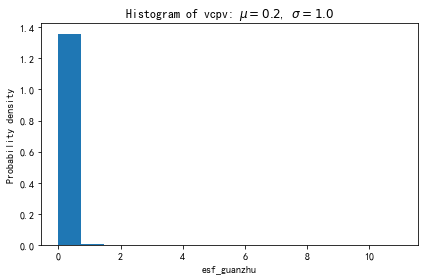

In [23]:
# 查看关注数分布情况-直方图

num_bins = 15
mu = 0.2  # mean of distribution
sigma = 1.0  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_esfgz_array, num_bins, density=True)

ax.set_xlabel('esf_guanzhu')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of vcpv: $\mu=0.2$, $\sigma=1.0$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 4、再看下二手房连接数分布

In [24]:
# 存放连接数据
esflj_array = np.array(esf_olduser_index.loc[:,'session_num_esf'])
esflj_not0_array = esflj_array[esflj_array>0]

In [25]:
# 存放连接百分位数,90%的数据都在20以下
esflj_not0_pct = np.array([np.percentile(esflj_not0_array, 10)
                       ,np.percentile(esflj_not0_array, 20)
                       ,np.percentile(esflj_not0_array, 30)
                       ,np.percentile(esflj_not0_array, 40)
                       ,np.percentile(esflj_not0_array, 50)
                       ,np.percentile(esflj_not0_array, 60)
                       ,np.percentile(esflj_not0_array, 70)
                       ,np.percentile(esflj_not0_array, 80)
                       ,np.percentile(esflj_not0_array, 90)
                       ,np.percentile(esflj_not0_array, 99)])
esflj_not0_pct

array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  4.,  7., 58.])

In [26]:
# 剔除异常值之后的连接数统计值

xflj_df = pd.DataFrame(esf_olduser_index.loc[:,'session_num_esf'])
norm_xflj_df = xflj_df[xflj_df<=7]
norm_xflj_df.describe()

,session_num_esf
count,1.713733e+06
mean,3.913445e-02
std,3.304735e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,7.000000e+00


Text(0.5, 1.0, '新房连接数分布 箱线图')

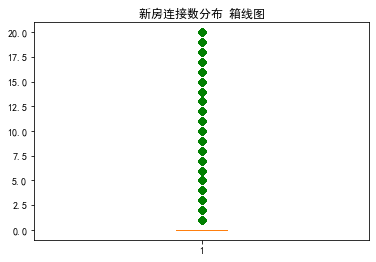

In [27]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_esflj_array=esflj_array[esflj_array<=20]
# change outlier point symbols
ax.boxplot(normal_esflj_array, 0, 'gD')
ax.set_title('新房连接数分布 箱线图')

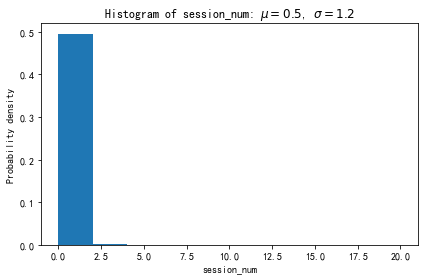

In [29]:
# 查看新房连接数分布情况-直方图

num_bins = 10
mu = 0.5  # mean of distribution
sigma = 1.2  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_esflj_array, num_bins, density=True)

ax.set_xlabel('session_num')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of session_num: $\mu=0.5$, $\sigma=1.2$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 4、再看二手房预约看房订单的数据分布

In [30]:
# 存放takelook_order_esf数据
esf_tk_array = np.array(esf_olduser_index.loc[:,'takelook_order_esf'])
esftk_not0_array = esf_tk_array[esf_tk_array>0]

In [31]:
# 存放takelook_order_esf百分位数,99%的数据都在5以下
esftk_not0_pct = np.array([np.percentile(esftk_not0_array, 10)
                       ,np.percentile(esftk_not0_array, 20)
                       ,np.percentile(esftk_not0_array, 30)
                       ,np.percentile(esftk_not0_array, 40)
                       ,np.percentile(esftk_not0_array, 50)
                       ,np.percentile(esftk_not0_array, 60)
                       ,np.percentile(esftk_not0_array, 70)
                       ,np.percentile(esftk_not0_array, 80)
                       ,np.percentile(esftk_not0_array, 90)
                       ,np.percentile(esftk_not0_array, 99)])
esftk_not0_pct

array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  3.,  4., 14.])

In [32]:
# 剔除异常值之后的二手房看房订单数统计值

esftk_df = pd.DataFrame(esf_olduser_index.loc[:,'takelook_order_esf'])
norm_esftk_df = esftk_df[esftk_df<=4]
norm_esftk_df.describe()

,takelook_order_esf
count,1.717698e+06
mean,1.242943e-03
std,5.086636e-02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.000000e+00


Text(0.5, 1.0, '新房连接数分布 箱线图')

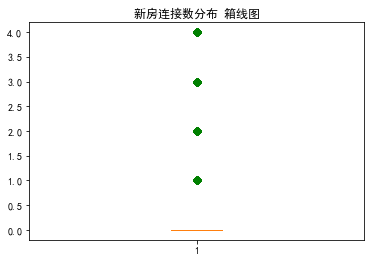

In [34]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_esftk_array=esf_tk_array[esf_tk_array<=4]
# change outlier point symbols
ax.boxplot(normal_esftk_array, 0, 'gD')
ax.set_title('新房连接数分布 箱线图')

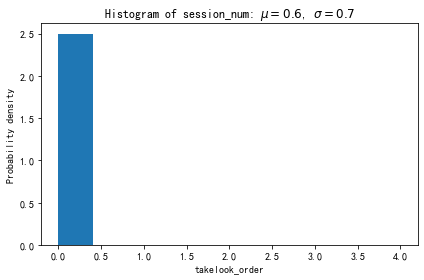

In [35]:
# 查看二手房看房订单分布情况-直方图

num_bins = 10
mu = 0.6  # mean of distribution
sigma = 0.7  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_esftk_array, num_bins, density=True)

ax.set_xlabel('takelook_order')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of session_num: $\mu=0.6$, $\sigma=0.7$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


In [36]:
# 读取数据
esf_score = pd.read_table('./files/esf_score.txt')
esf_score.head()

,cal_dt,muid,imei_md5,oaid,origin_imei,os_type,vppv_esf,session_num_esf,guanzhu_esf,takelook_order_esf,vppv_esf_score,session_esf_score,guanzhu_esf_score,takelook_esf_score,total_score
0,2021-05-22,"a-ajk,001f09fb6b669ac8,",001f09fb6b669ac8,f8e7ffbf-e657-1a51-ff7f-df6edfdf8325,NaN,android,0,0,0,0,0,0,0,0,0.0
1,2021-05-22,"a-ajk,0055a4f1be12f100,0055a4f1be12f100",0055a4f1be12f100,4e8afcdf-b5d4-b130-fdf7-3ed6ffceeaf3,NaN,android,0,0,0,0,0,0,0,0,0.0
2,2021-05-22,"a-ajk,005d1640ec6b5a48,005d1640ec6b5a48",005d1640ec6b5a48,acc809280987bef6,99001405868302,android,0,0,0,0,0,0,0,0,0.0
3,2021-05-22,"a-ajk,008e48c80730ebd2,008e48c80730ebd2",008e48c80730ebd2,83793721c360dd597019cf8ea6b14d21cdb37317e4e87b...,NaN,android,0,0,0,0,0,0,0,0,0.0
4,2021-05-22,"a-ajk,00d21da7a7790754,",00d21da7a7790754,f5beafaf-ffff-700f-fbfd-bf7f95fce1e4,868400046549237,android,0,0,0,0,0,0,0,0,0.0


In [37]:
# 存放总分数据
total_score_array = np.array(esf_score.loc[:,'total_score'])
total_score_not0_array = total_score_array[total_score_array>0]

In [38]:
# 存放total_score百分位数,99%的数据都在5以下
total_score_not0_pct = np.array([np.percentile(total_score_not0_array, 10)
                       ,np.percentile(total_score_not0_array, 20)
                       ,np.percentile(total_score_not0_array, 30)
                       ,np.percentile(total_score_not0_array, 40)
                       ,np.percentile(total_score_not0_array, 50)
                       ,np.percentile(total_score_not0_array, 60)
                       ,np.percentile(total_score_not0_array, 70)
                       ,np.percentile(total_score_not0_array, 80)
                       ,np.percentile(total_score_not0_array, 90)
                       ,np.percentile(total_score_not0_array, 99)])
total_score_not0_pct

array([0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 1.6, 4. , 5.8])

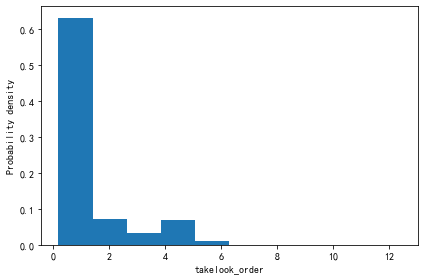

In [40]:
# 查看二手房看房订单分布情况-直方图

num_bins = 10
# mu = 0.6  # mean of distribution
# sigma = 0.7  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(total_score_array[total_score_array>0], num_bins, density=True)

ax.set_xlabel('takelook_order')
ax.set_ylabel('Probability density')
# ax.set_title(r'Histogram of session_num: $\mu=0.6$, $\sigma=0.7$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()